In [31]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

In [32]:
property_prices = [4, 8, 6, 3, 12, 15] # total 48 
variables_wires = [0, 1, 2, 3, 4, 5]
aux_oracle_wires = [6, 7, 8 ,9 ,10, 11]

In [33]:
def oracle(variables_wires, aux_oracle_wires):
    
    def add_k_fourier(k, wires):
        for j in range(len(wires)):
            qml.RZ(k * np.pi / (2**j), wires=wires[j])
            
    def value_second_sibling():
        
        qml.QFT(wires = aux_oracle_wires)
        
        for wire in variables_wires:
            qml.ctrl(add_k_fourier, control = wire)(property_prices[wire], wires = aux_oracle_wires)
            
        qml.adjoint(qml.QFT)(wires = aux_oracle_wires)
        
    value_second_sibling()
    qml.FlipSign(sum(property_prices) // 2, wires = aux_oracle_wires)
    qml.adjoint(value_second_sibling)()

In [34]:
dev = qml.device("default.qubit", wires = variables_wires + aux_oracle_wires)

In [35]:
@qml.qnode(dev)
def circuit():
    
    # step 1 - superposition
    for wire in variables_wires:
        qml.Hadamard(wires = wire)
        
       
    # step 2 - oracle to mark correct elements
    oracle(variables_wires, aux_oracle_wires)

    # step 3 - apply Grover operator
    qml.GroverOperator(wires = variables_wires)
    
    return qml.probs(wires = variables_wires)

<BarContainer object of 64 artists>

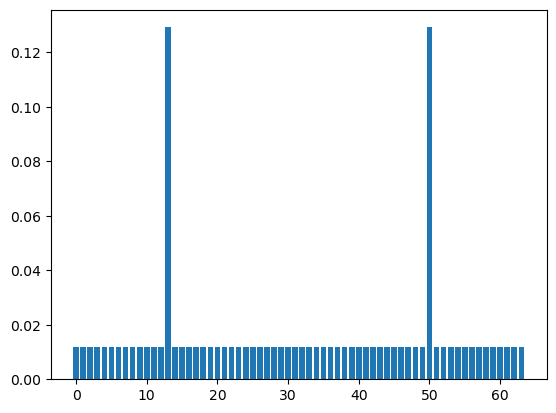

In [36]:
values = circuit()
plt.bar(range(len(values)), values)

In [37]:
dev = qml.device("default.qubit", wires = variables_wires + aux_oracle_wires, shots=1)

In [38]:
@qml.qnode(dev)
def circuit():
    
    # step 1 - superposition
    for wire in variables_wires:
        qml.Hadamard(wires = wire)
        
    for _ in range(3):
       
        # step 2 - oracle to mark correct elements
        oracle(variables_wires, aux_oracle_wires)

        # step 3 - apply Grover operator
        qml.GroverOperator(wires = variables_wires)
    
    return qml.probs(wires = variables_wires)

In [39]:
values = circuit()
print(values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<BarContainer object of 64 artists>

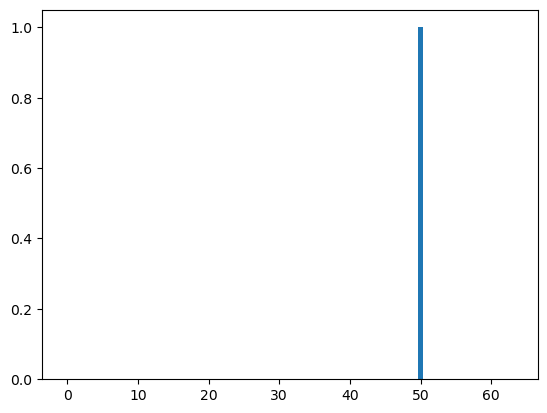

In [40]:
plt.bar(range(len(values)), values)